In [68]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 

In [69]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
x_test.shape

(10000, 28, 28)

In [72]:
y_train.shape

(60000,)

In [73]:
y_test.shape

(10000,)

image

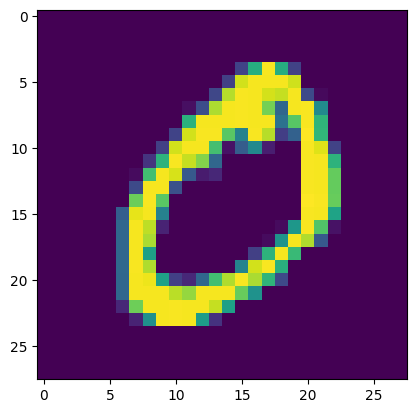

In [74]:
plt.imshow(x_train[1])

image normalization(value between 0 to 1)

In [75]:
def normalize(image):
    image=tf.cast(image/255.,tf.float32)
    return image
x_train=normalize(x_train)
x_test=normalize(x_test)

In [76]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [77]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
earlystop=EarlyStopping()

In [79]:
# model compilation
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model training

In [81]:
history=model.fit(x_train,y_train, epochs=20, validation_split=.2,callbacks=[earlystop],verbose=0)

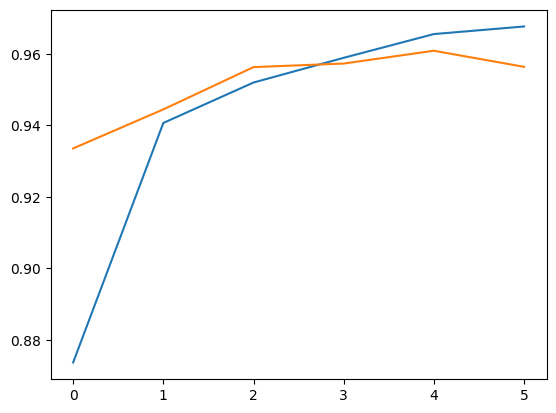

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

predicting the probabilty of image be a number

In [85]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


storing result

In [87]:
y_pred=y_prob.argmax(axis=1)

In [86]:
y_prob[0]

array([2.9966641e-06, 2.5131569e-05, 1.3194896e-03, 2.0880006e-01,
       1.2981911e-08, 7.8781340e-03, 1.4469135e-09, 7.6515830e-01,
       5.4072298e-04, 1.6275134e-02], dtype=float32)

accuracy

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9555

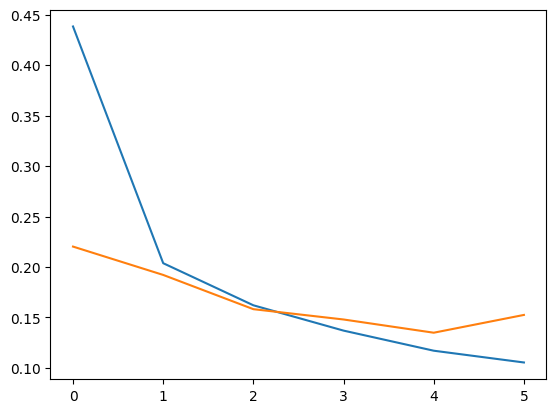

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])